# Cluster model (K-means)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Dropping-duplicate-index-column" data-toc-modified-id="Dropping-duplicate-index-column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping duplicate index column</a></span></li><li><span><a href="#Reducing-number-of-items-in-brand-column" data-toc-modified-id="Reducing-number-of-items-in-brand-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reducing number of items in brand column</a></span></li><li><span><a href="#Get-dummies-for-brand-column" data-toc-modified-id="Get-dummies-for-brand-column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get dummies for brand column</a></span></li><li><span><a href="#New-dataframe-(numerical-columns-only)" data-toc-modified-id="New-dataframe-(numerical-columns-only)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New dataframe (numerical columns only)</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Scaling the data</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#First-run-(k=3)" data-toc-modified-id="First-run-(k=3)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First run (k=3)</a></span></li><li><span><a href="#Chosing-the-best-k" data-toc-modified-id="Chosing-the-best-k-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Chosing the best k</a></span></li><li><span><a href="#Silhouette-score" data-toc-modified-id="Silhouette-score-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Silhouette score</a></span></li><li><span><a href="#Final-model-(k=8)" data-toc-modified-id="Final-model-(k=8)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Final model (k=8)</a></span></li></ul></li></ul></div>

## Libraries

In [48]:
from fuzzywuzzy import process

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df.shape

(1232, 16)

In [4]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


## Preprocessing the data

### Dropping duplicate index column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

### Reducing number of items in brand column

In [6]:
pd.set_option('display.max_rows', 20)

In [7]:
brand_count = pd.DataFrame(df['brand'].value_counts()).reset_index()
brand_count

,index,brand
0,Koro,221
1,Foodist,96
2,mind sweets,40
3,Plamil,30
4,Heimatgut,29
...,...,...
99,Liebhart's,1
100,Lord of Tofu,1
101,Sonnentor,1
102,Céliane,1


In [8]:
keep_brands = brand_count['index'][brand_count['brand']>10].to_list()

In [9]:
len(keep_brands)

34

In [10]:
def clean_brand(col, lst_brands=[]):
    
    brand_new = []
    
    for p in col:
        if p not in lst_brands:
            brand_new.append('Other')
        else:
            brand_new.append(p)
    
    return brand_new

In [11]:
df['brand_new'] = clean_brand(df['brand'], lst_brands=keep_brands)
df['brand_new'].value_counts()

Other               338
Koro                221
Foodist              96
mind sweets          40
Plamil               30
                   ... 
Banabar              12
Dörrwerk             12
Vitaina Italia       12
Vantastic Foods      11
rosmarin BIOBACK     11
Name: brand_new, Length: 35, dtype: int64

### Get dummies for brand column

In [12]:
df_new = pd.get_dummies(df, columns=['brand_new'])
df_new.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,...,0,0,0,0,0,0,0,0,0,0


### New dataframe (numerical columns only)

In [13]:
df_model = df_new.select_dtypes(np.number)

In [14]:
df_model.head()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with null values

In [15]:
df_model.isna().sum().sort_values(ascending=False)

fibre                     707
salt                       83
protein                    15
fat                        13
sat_fat                    13
                         ... 
brand_new_Landgarten        0
brand_new_Lini's Bites      0
brand_new_Lovechock         0
brand_new_MYLKCHOCY         0
brand_new_ÖKOVITAL          0
Length: 46, dtype: int64

In [16]:
def per_NaN_columns(df):
    nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_nulls'])
    nulls = nulls.sort_values('percentage_nulls', ascending = False)
    return nulls

In [17]:
nulls = per_NaN_columns(df_model)
nulls

,percentage_nulls
fibre,57.386364
salt,6.737013
protein,1.217532
fat,1.055195
sat_fat,1.055195
...,...
brand_new_Landgarten,0.000000
brand_new_Lini's Bites,0.000000
brand_new_Lovechock,0.000000
brand_new_MYLKCHOCY,0.000000


**Conclusion:**
- the percentage of null-values for fibre is too high = column will be dropped
- all other null-values will be replaced by the mean of the column

In [18]:
def fill_NaN(df):
    for col in df:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)    
    return df

In [19]:
df_model = fill_NaN(df_model)

In [20]:
df_model.isna().sum().sort_values(ascending=False)

price                            0
brand_new_Taste of Nature        0
brand_new_Moo Free               0
brand_new_N.A! Nature Addicts    0
brand_new_Naturata               0
                                ..
brand_new_Green & More           0
brand_new_Heimatgut              0
brand_new_Koro                   0
brand_new_Landgarten             0
brand_new_ÖKOVITAL               0
Length: 46, dtype: int64

### Dealing with outliers

In [21]:
def showing_dist_box(df):
   
    for col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        # sns.set_style("darkgrid")

        sns.distplot(df[col], ax=axes[0])
        sns.boxplot(df[col], ax=axes[1])
        
        plt.show()

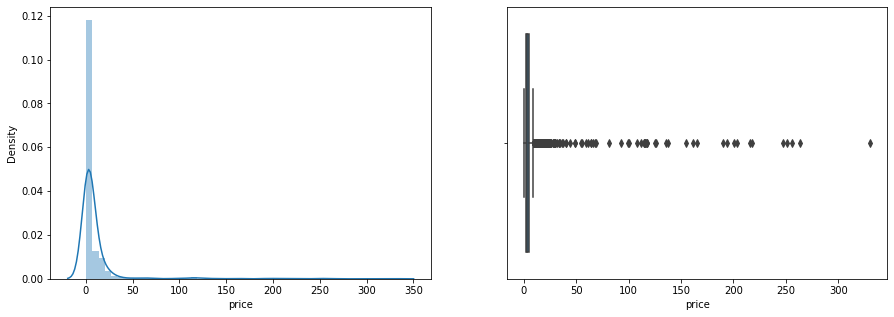

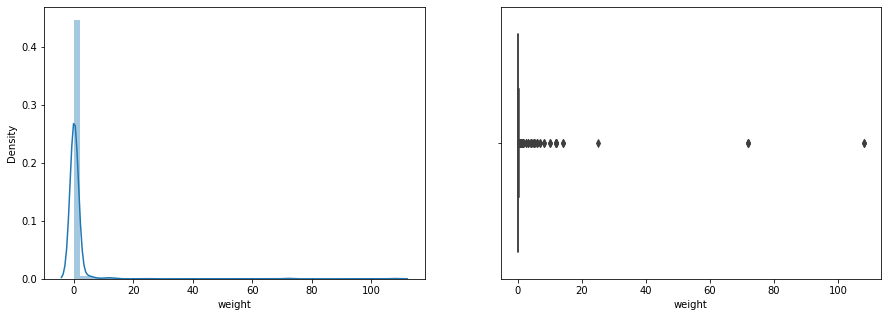

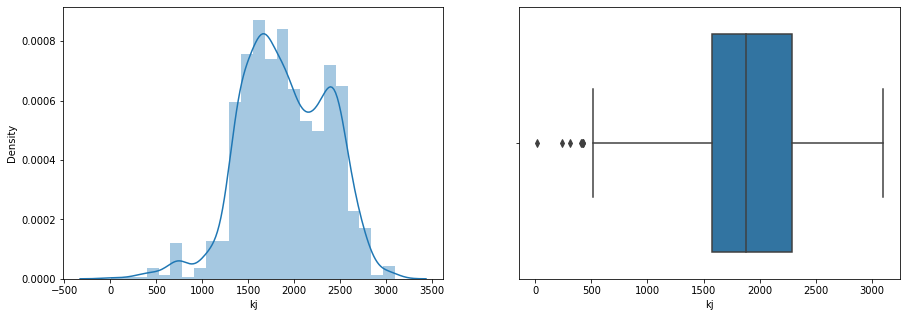

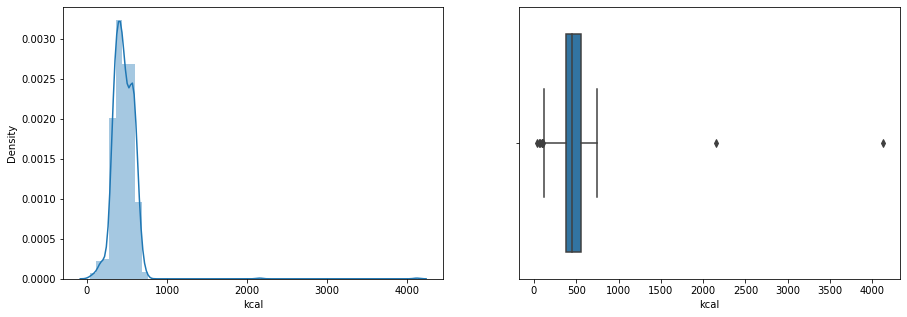

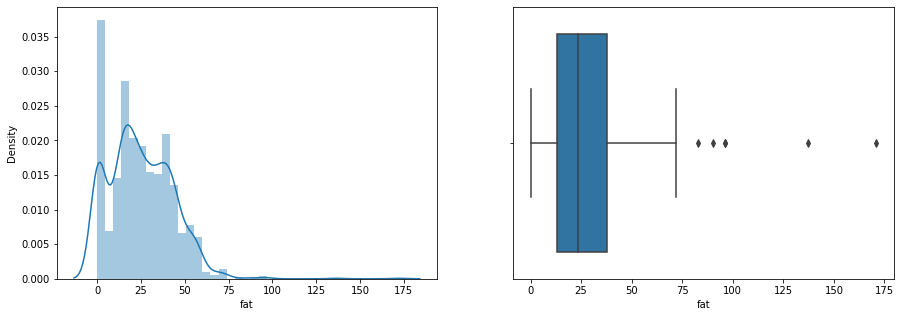

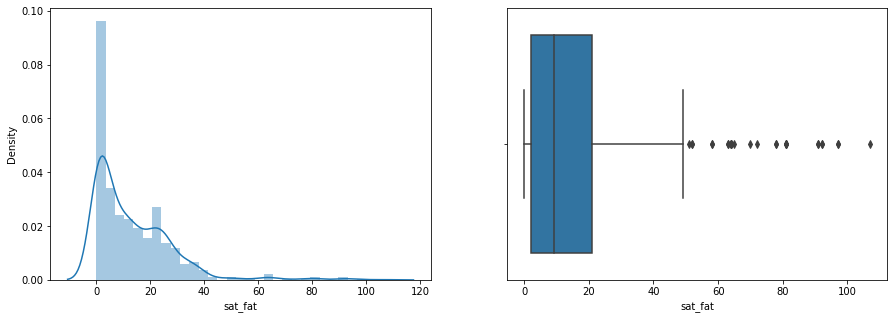

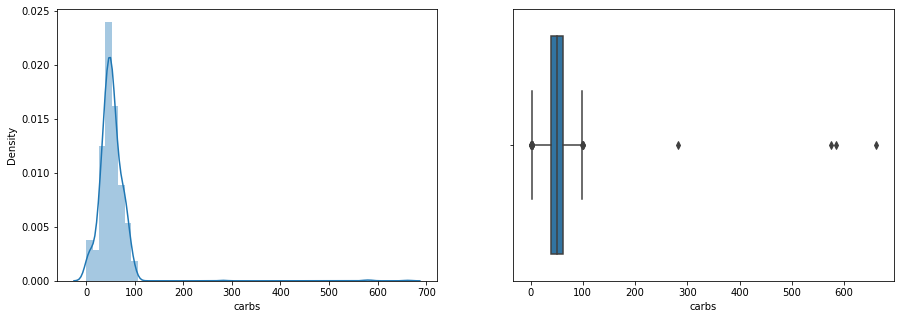

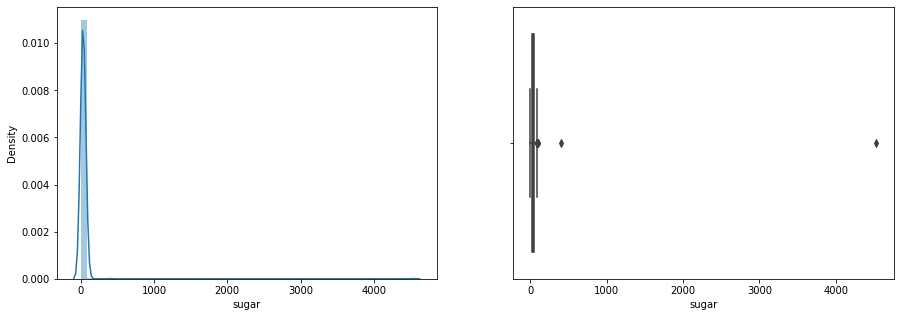

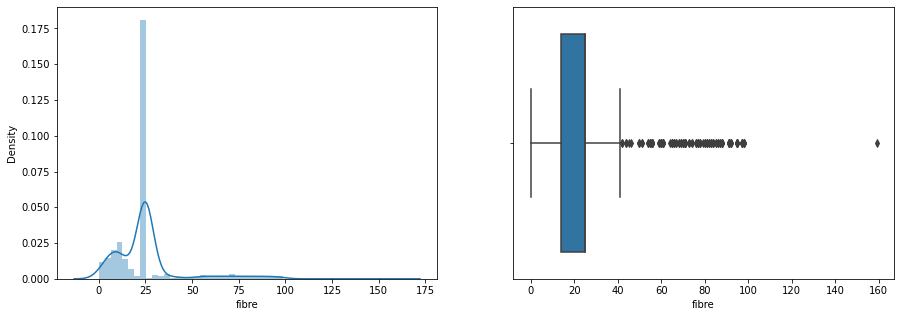

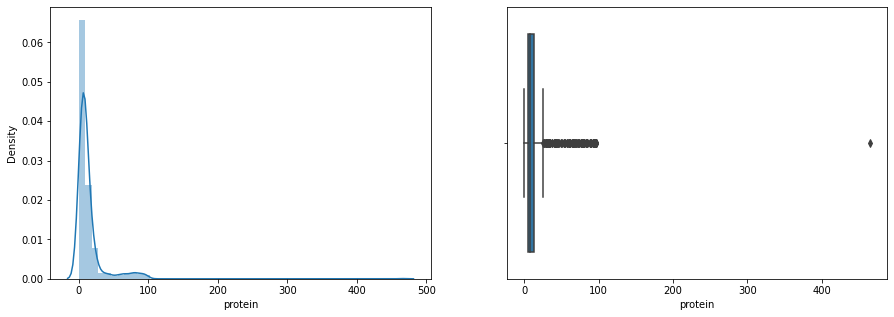

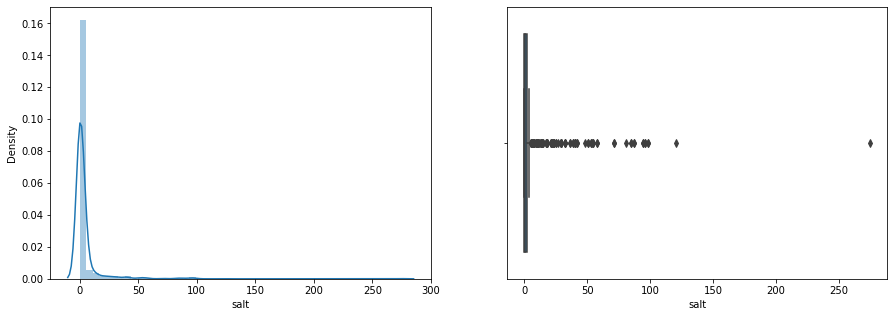

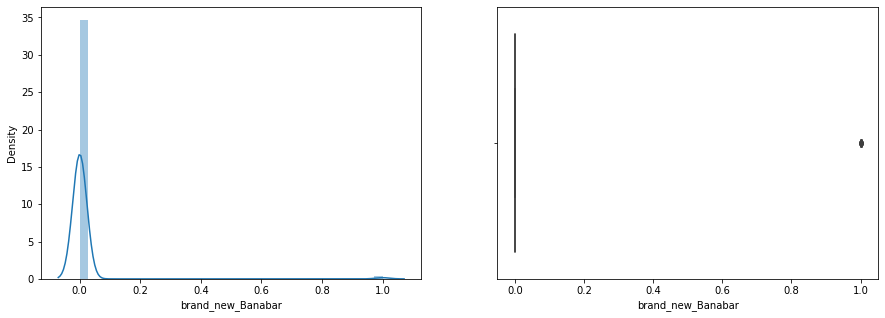

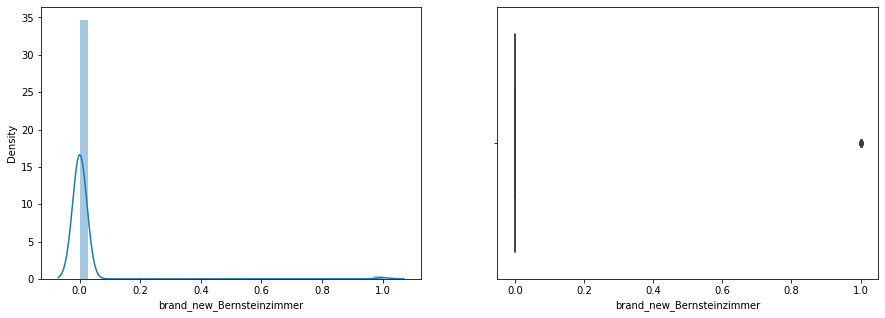

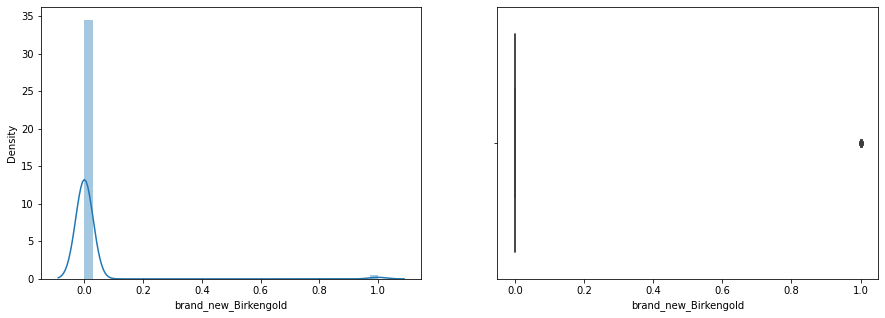

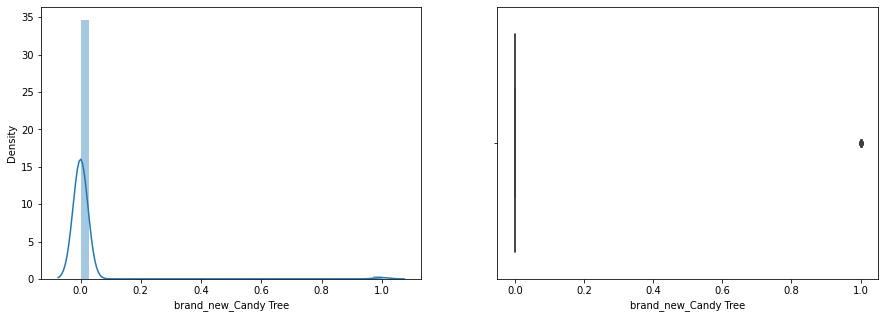

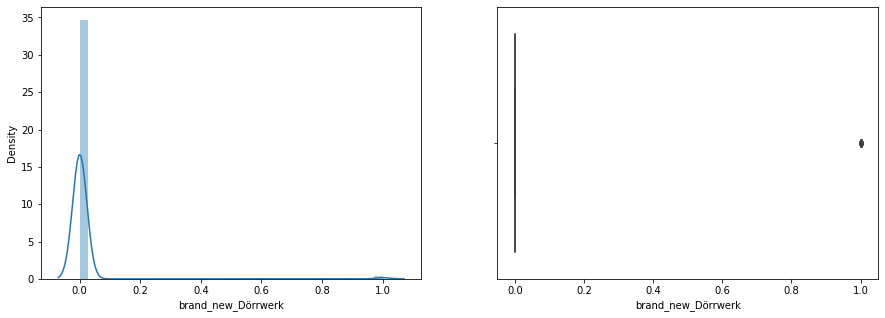

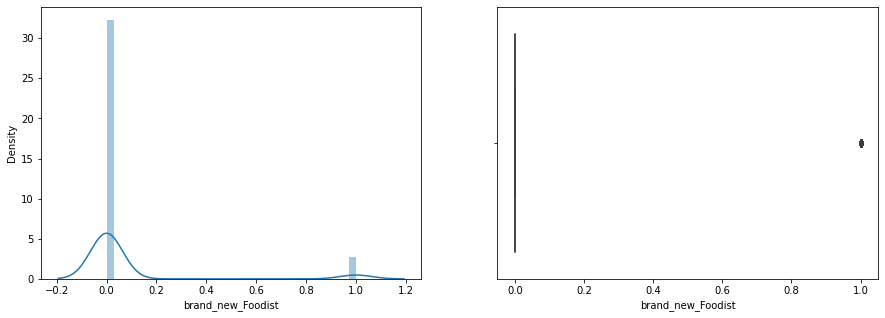

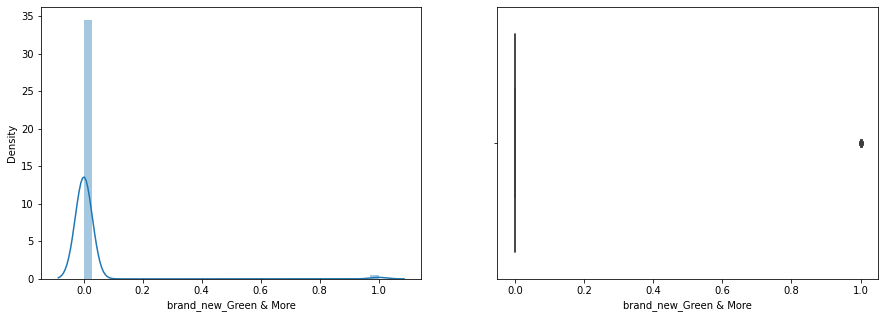

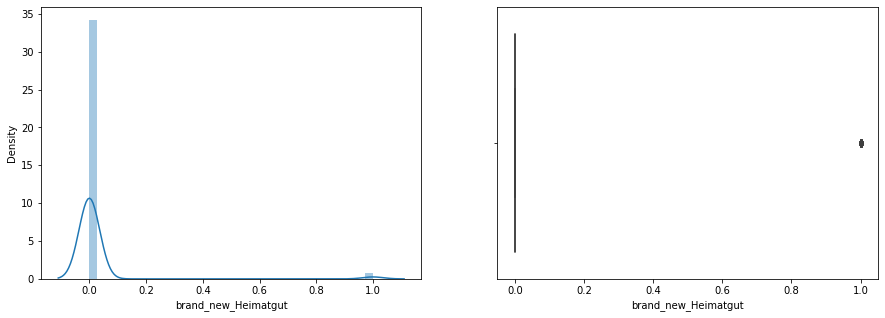

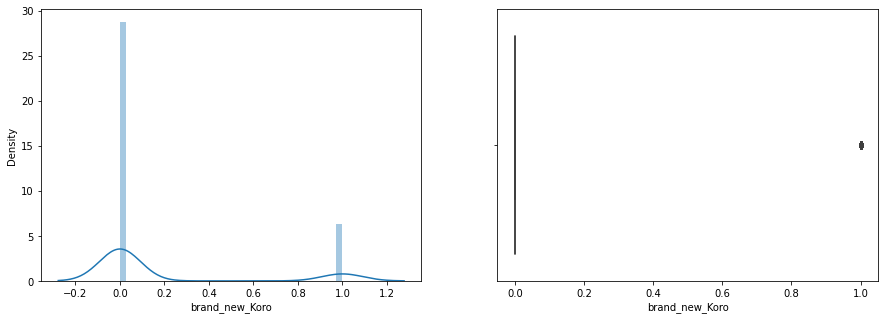

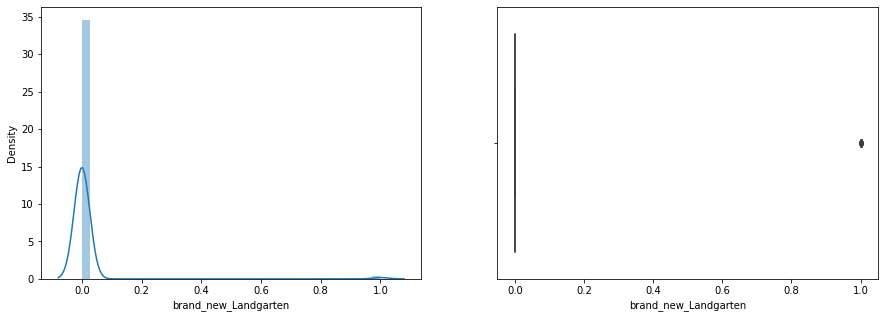

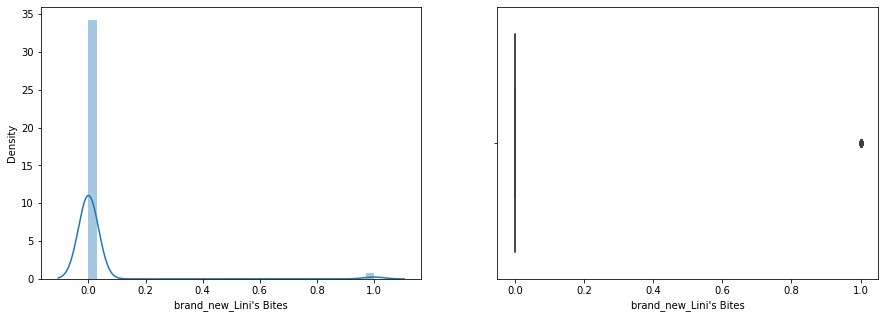

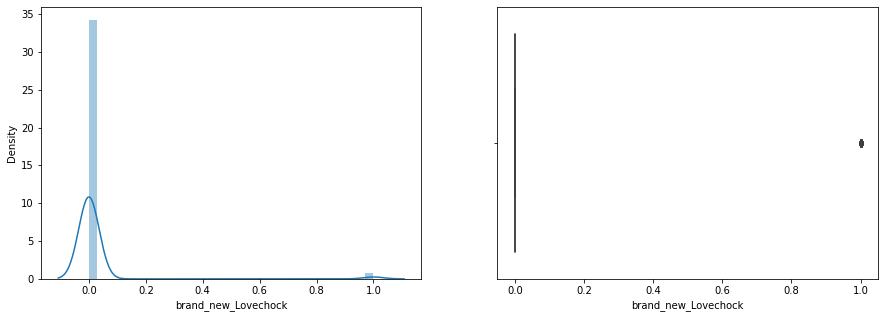

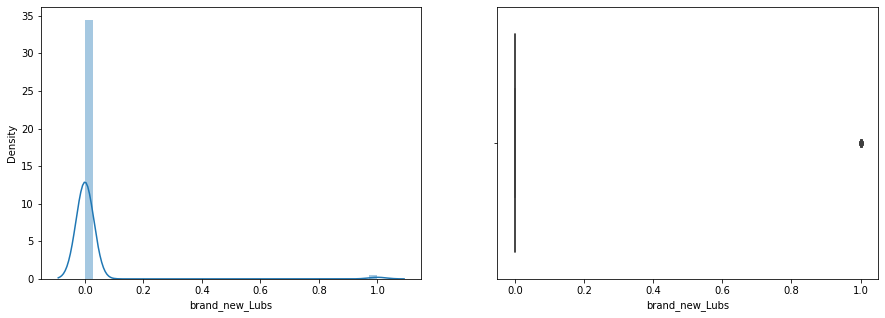

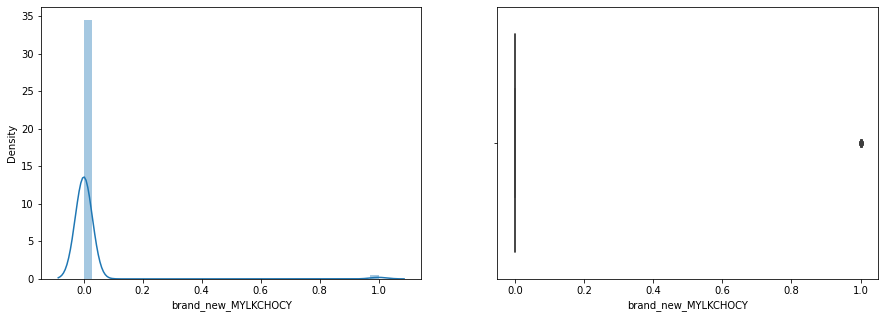

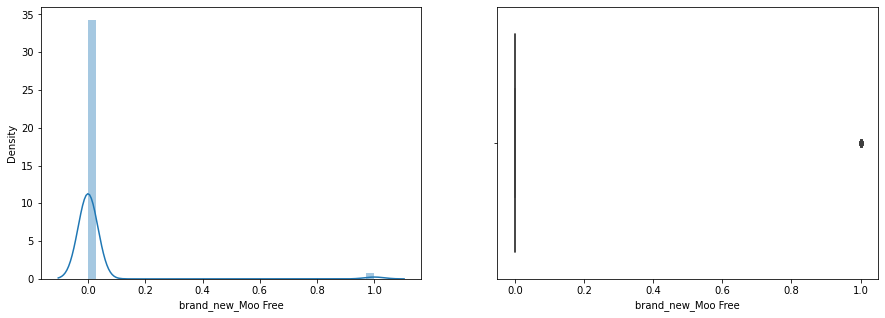

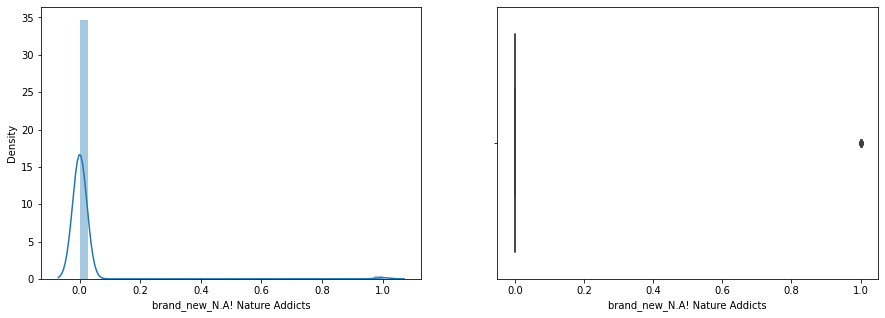

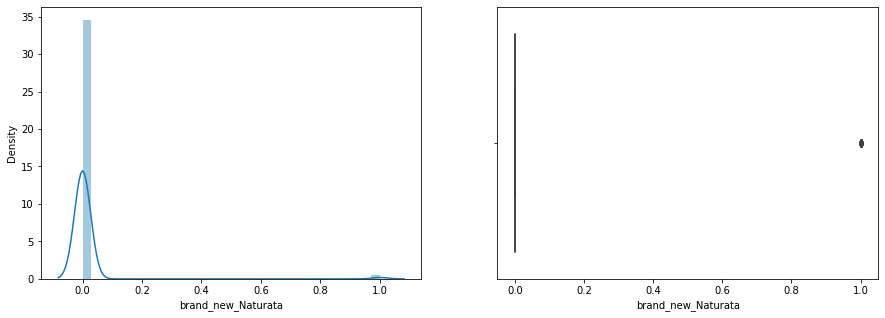

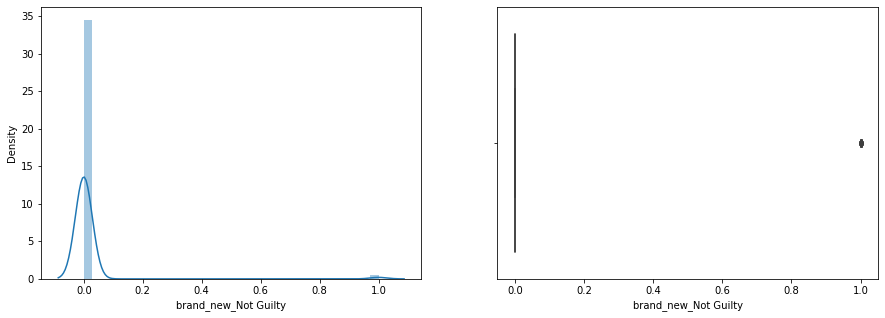

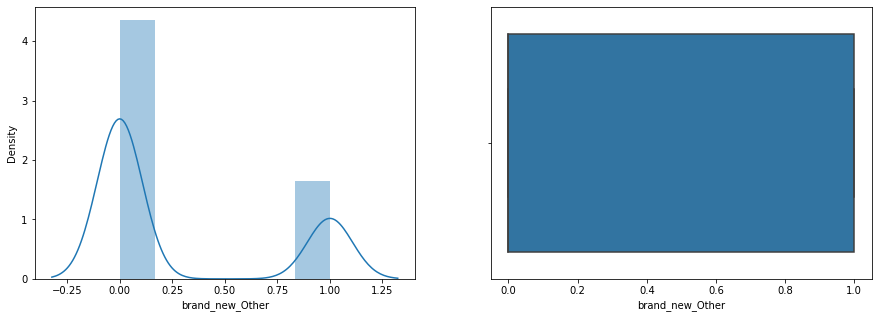

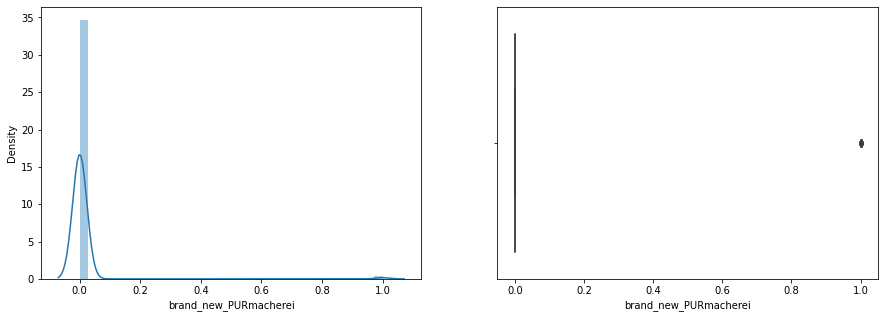

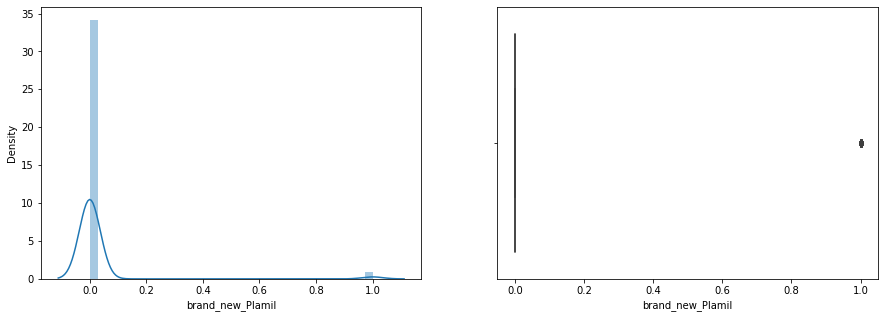

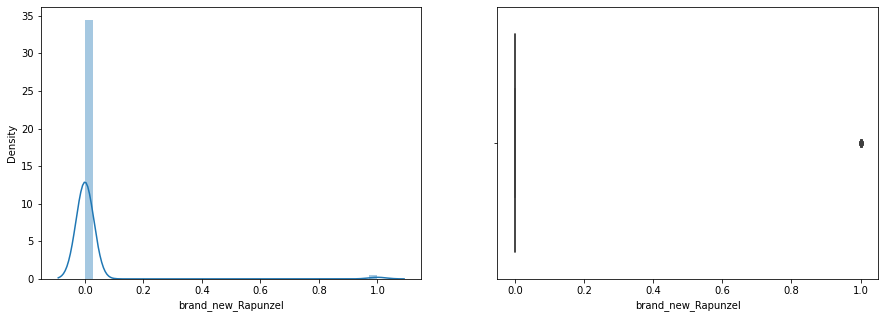

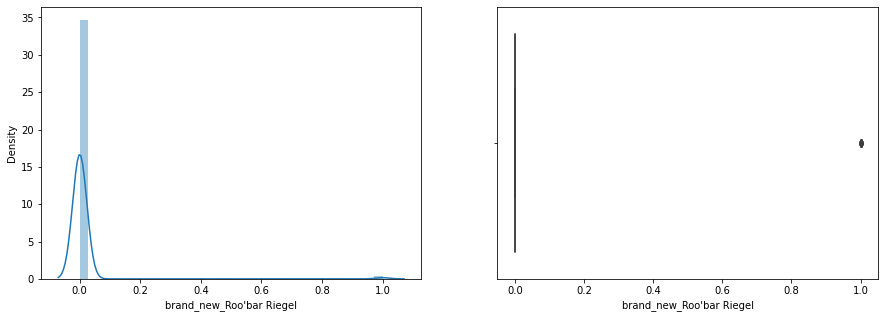

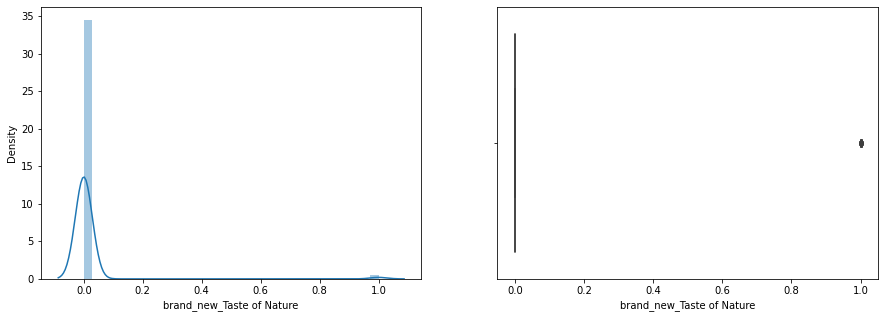

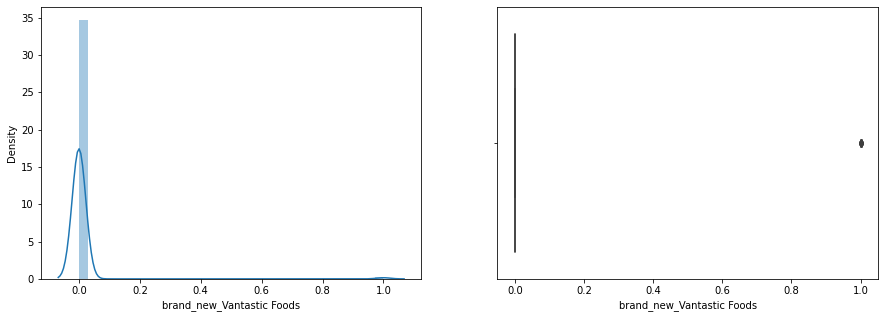

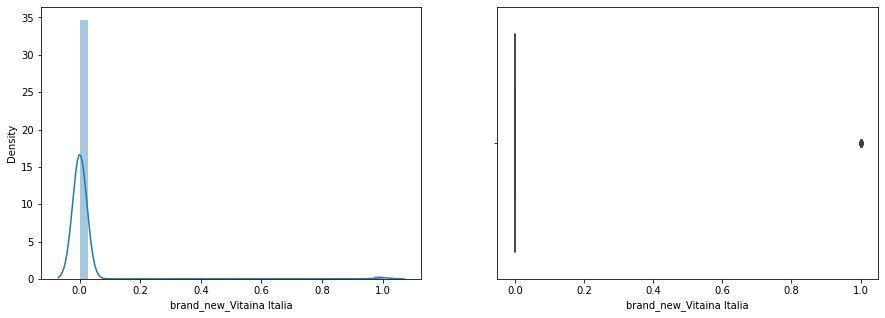

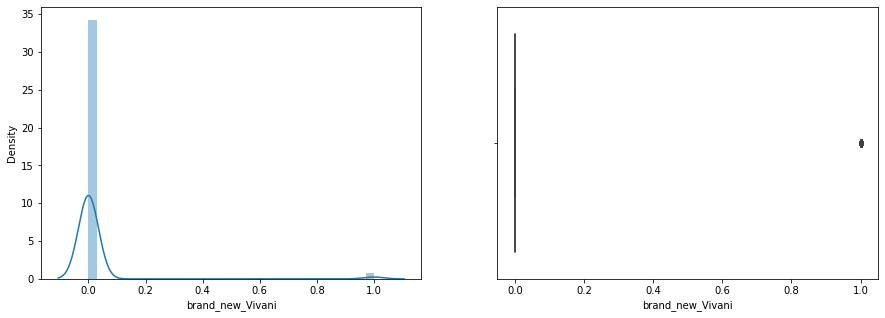

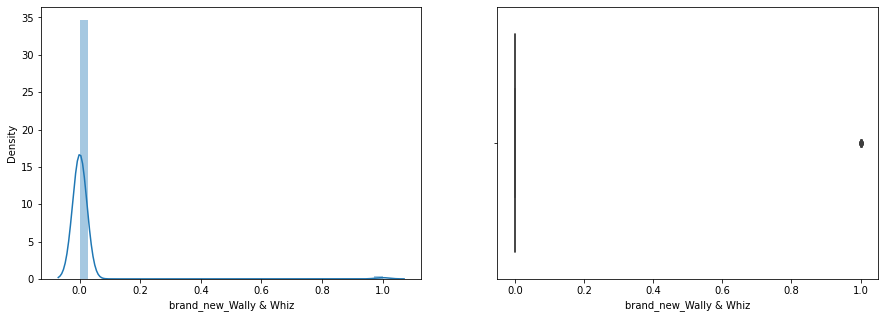

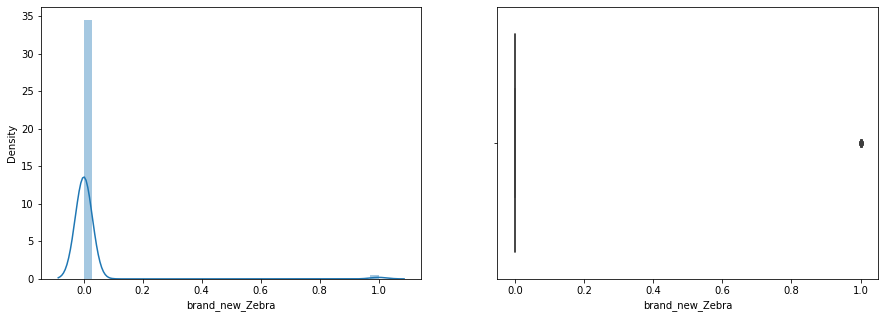

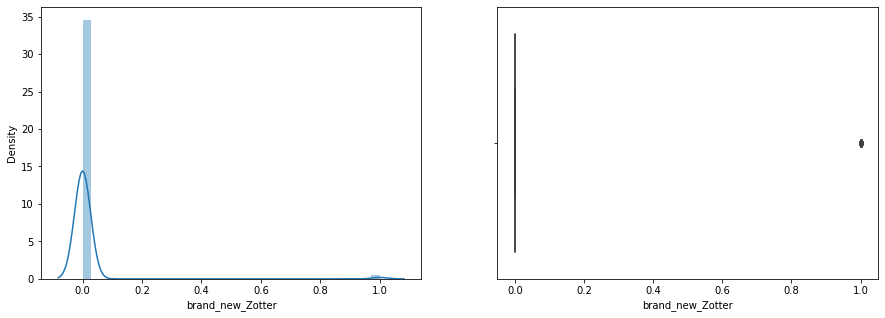

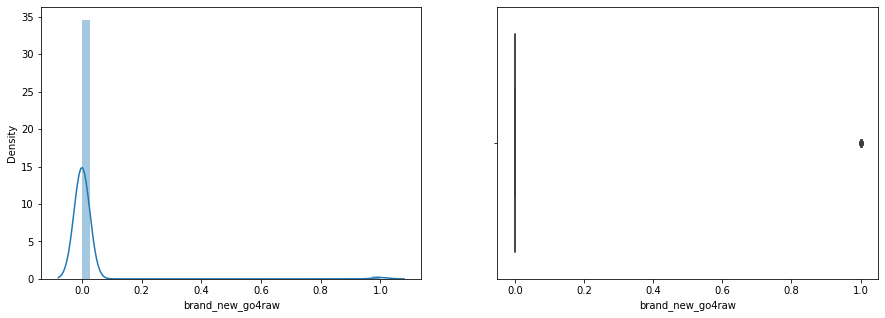

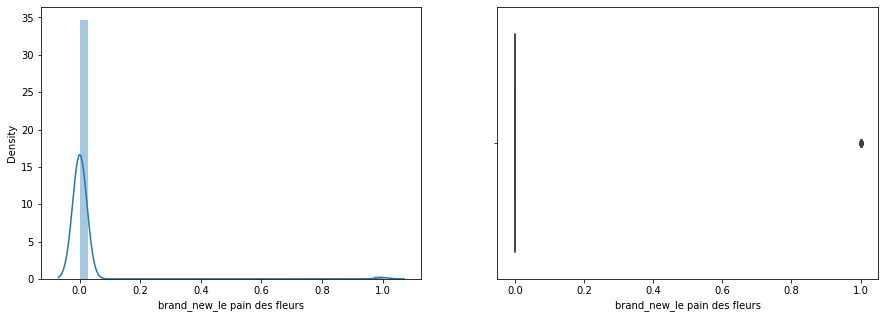

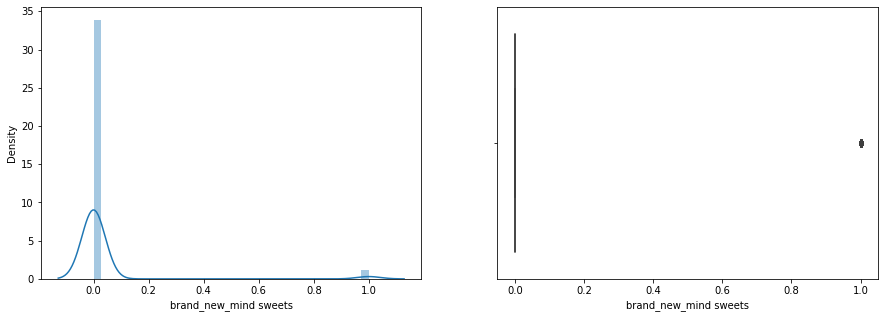

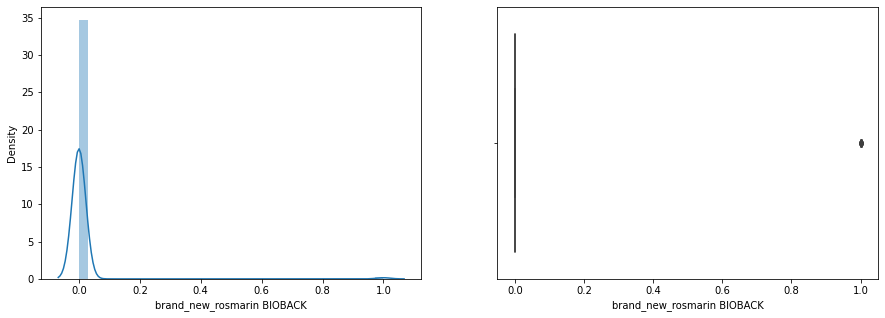

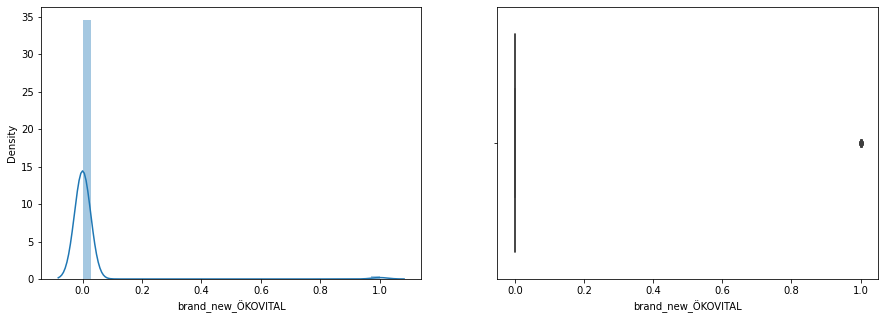

In [22]:
showing_dist_box(df_model)

In [23]:
df_model.columns

Index(['price', 'weight', 'kj', 'kcal', 'fat', 'sat_fat', 'carbs', 'sugar',
       'fibre', 'protein', 'salt', 'brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', 'brand_new_Lini's Bites', 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', 'brand_new_Roo'bar Riegel',
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_ro

In [24]:
def cutting_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [25]:
in_col = ['price', 'weight', 'kj', 'kcal', 'fat', 'sat_fat', 'carbs', 'sugar',
       'fibre', 'protein', 'salt']

skip_col = ['brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', "brand_new_Lini's Bites", 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', "brand_new_Roo'bar Riegel",
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',
       'brand_new_ÖKOVITAL']

df_model = cutting_outliers(df_model, threshold=1.5, in_columns=in_col, skip_columns=skip_col)

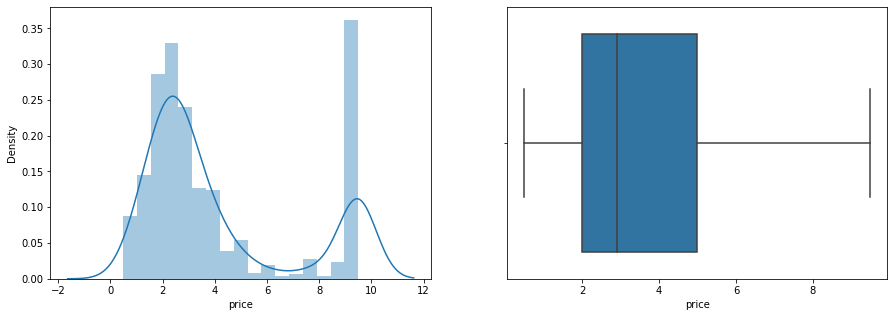

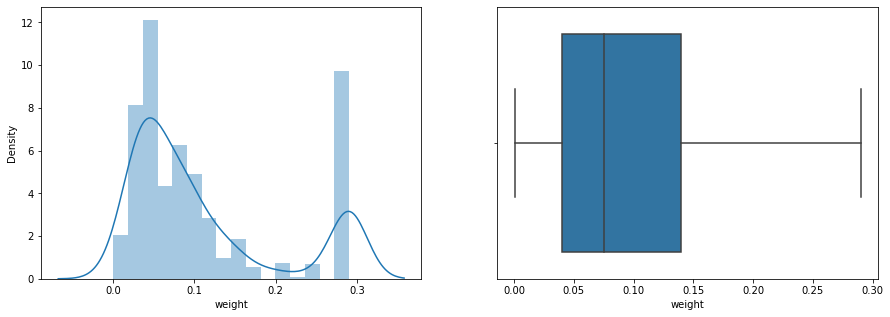

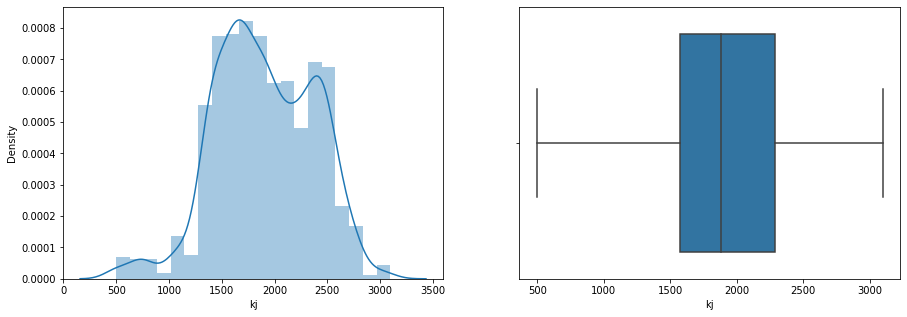

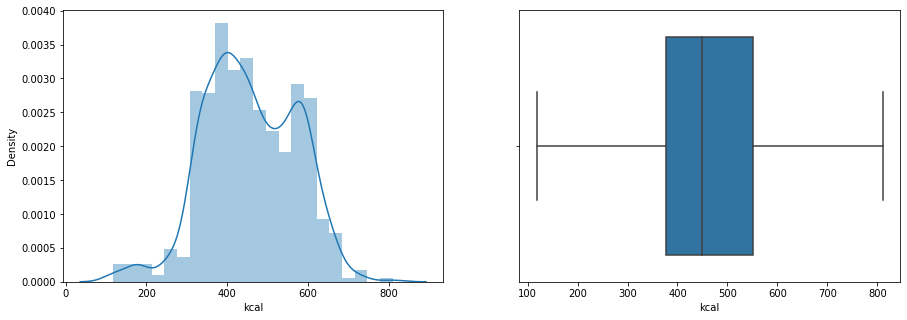

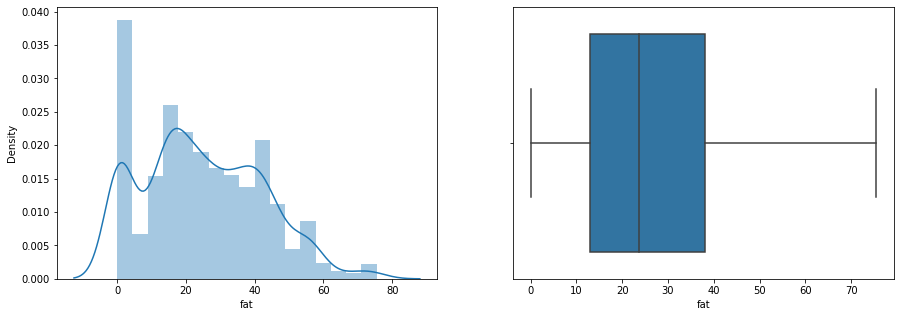

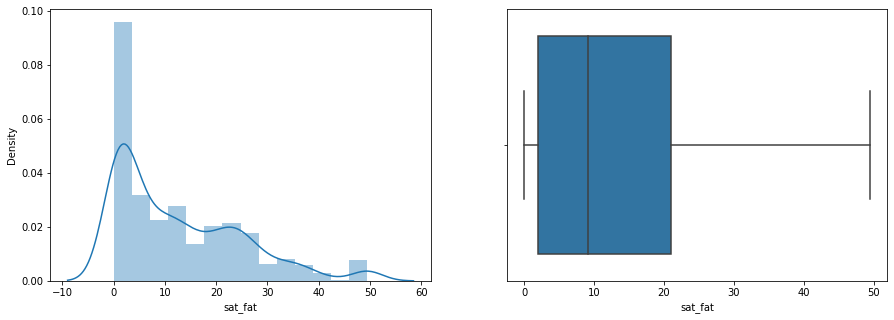

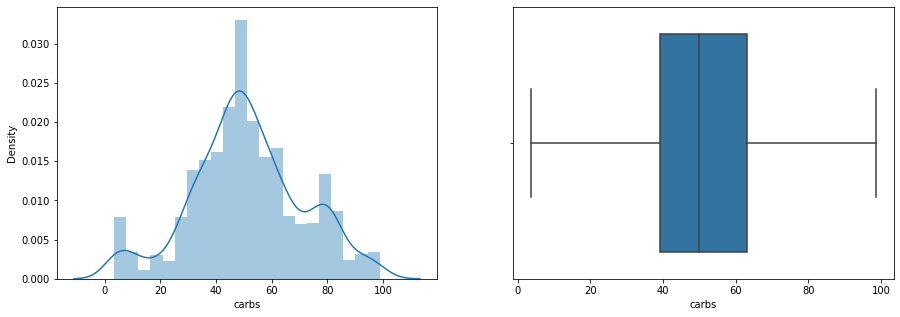

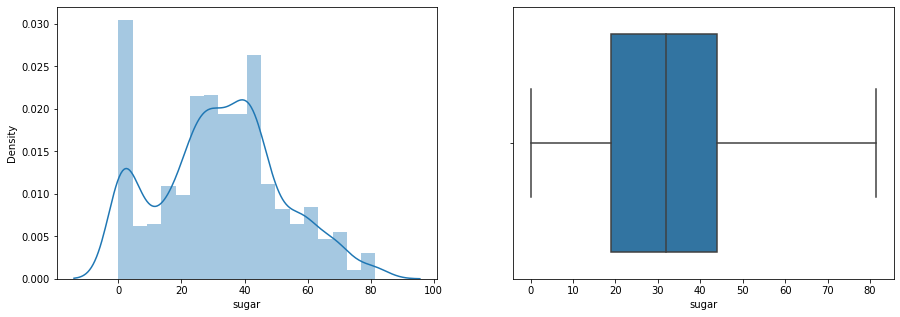

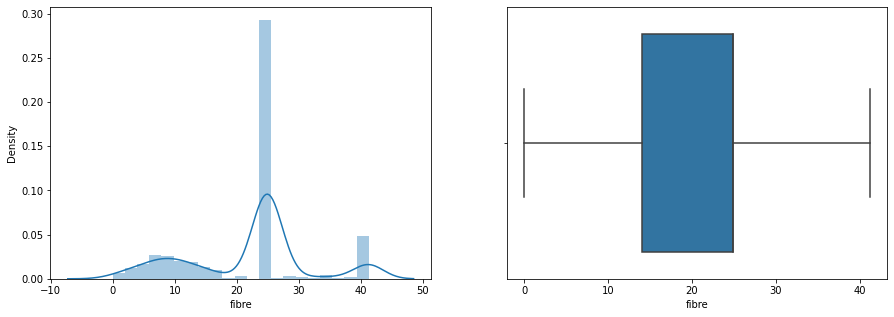

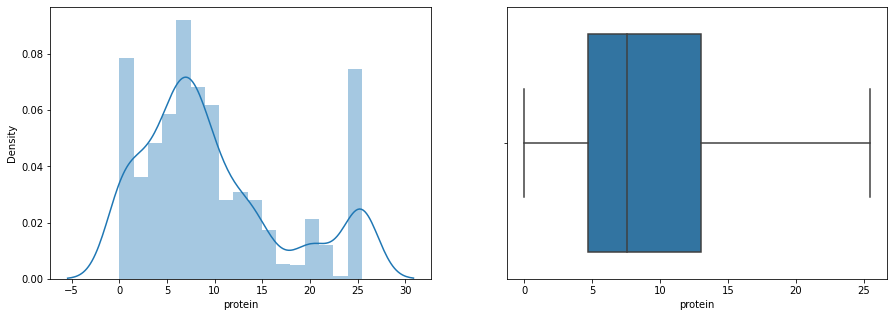

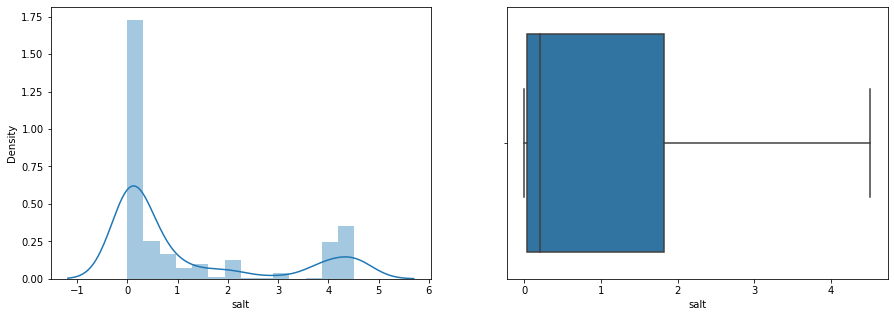

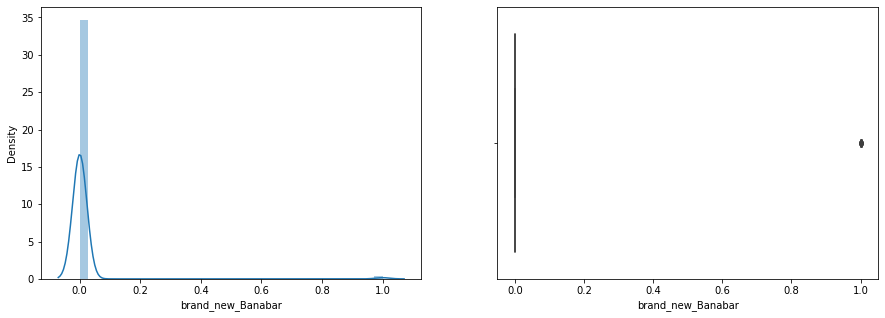

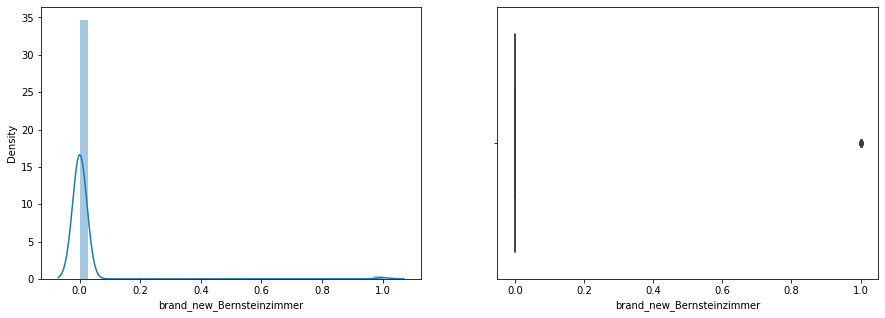

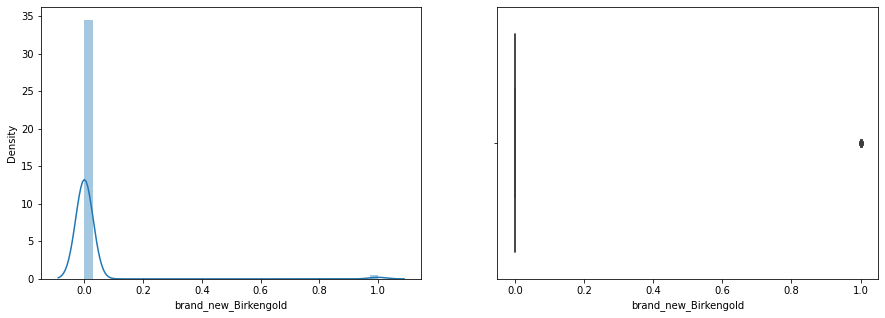

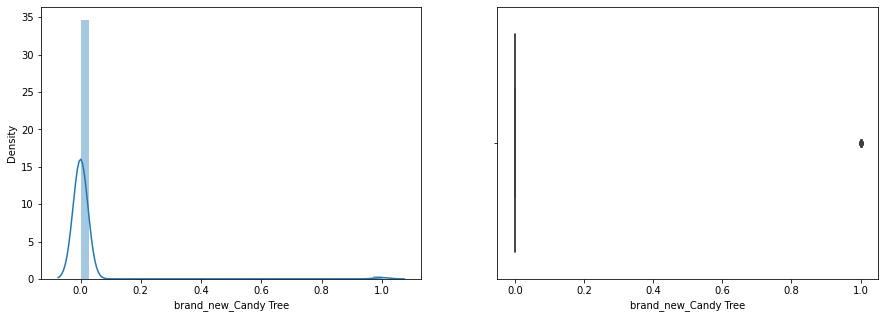

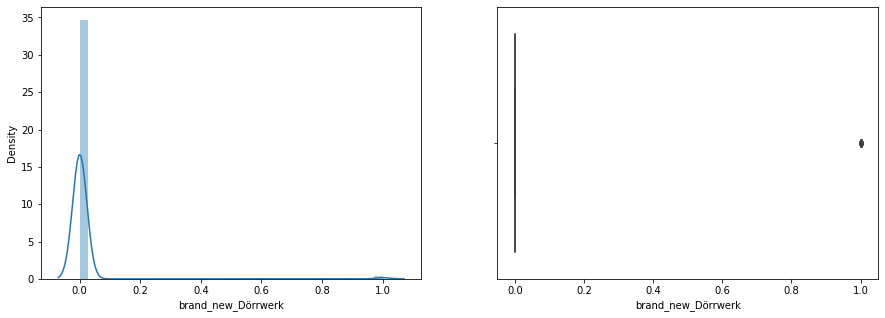

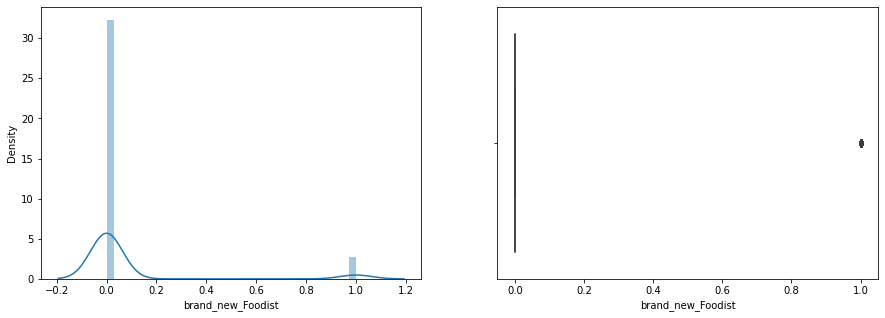

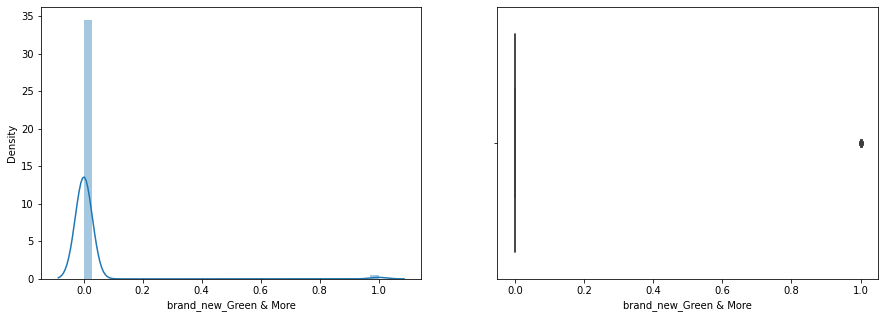

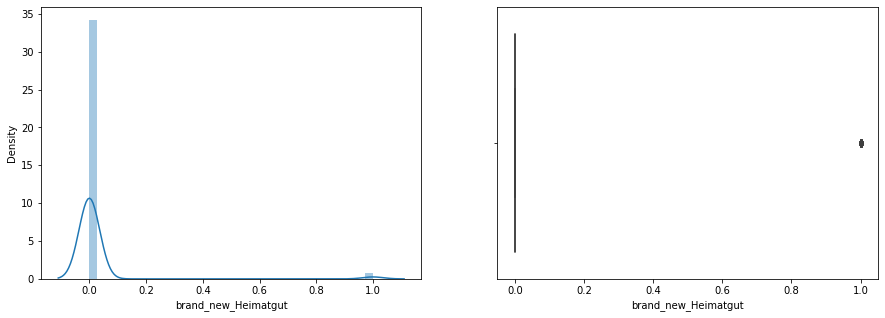

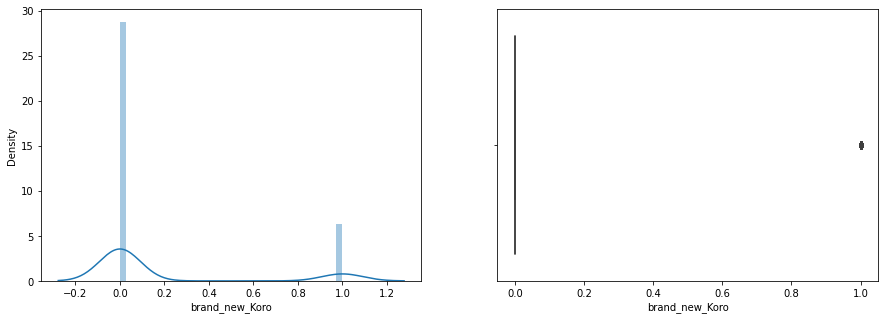

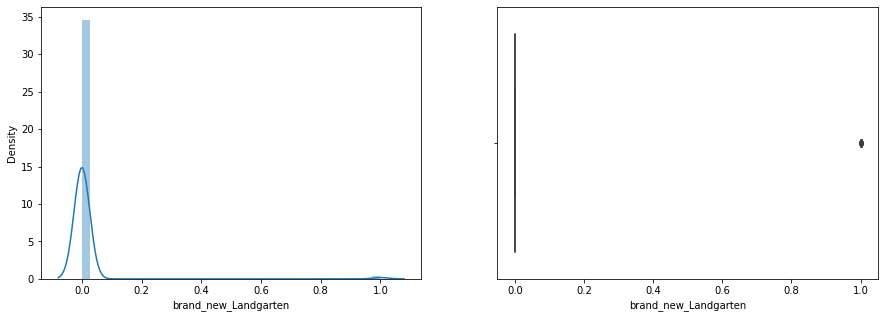

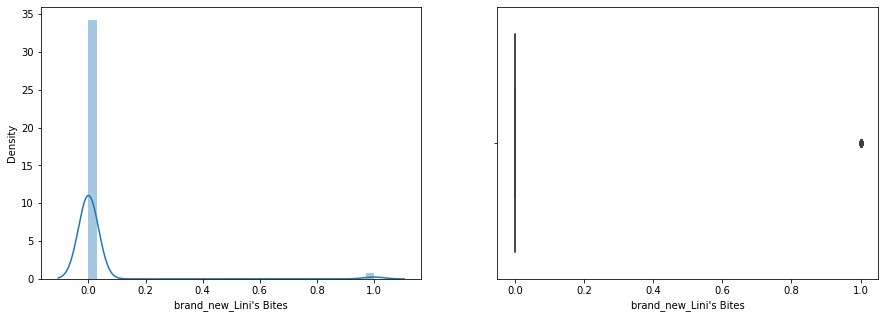

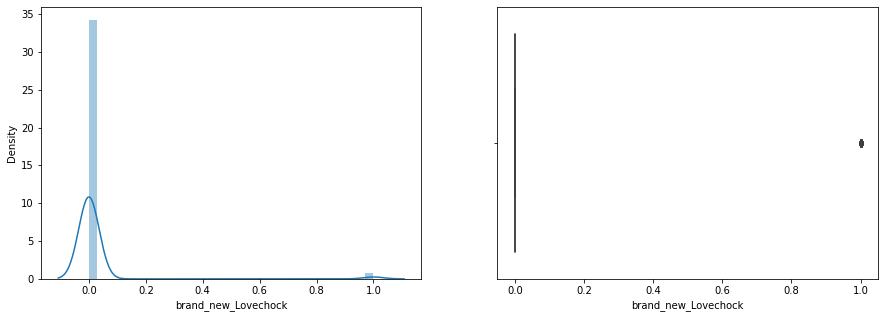

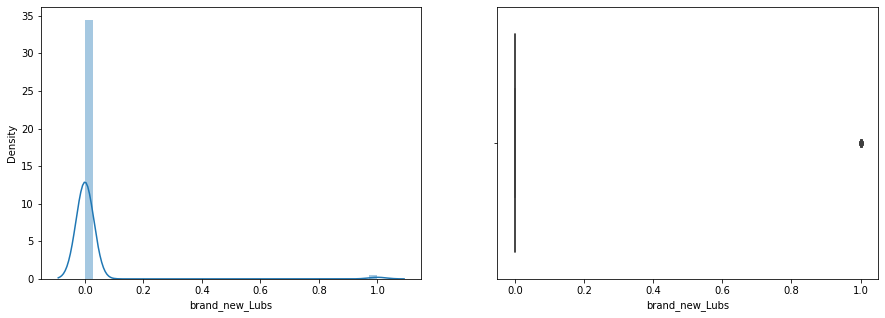

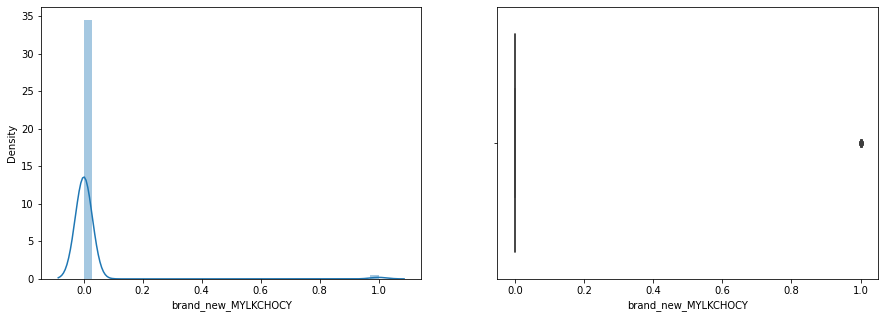

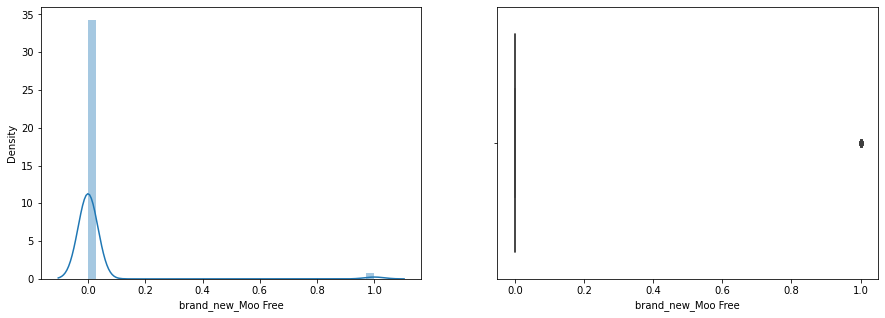

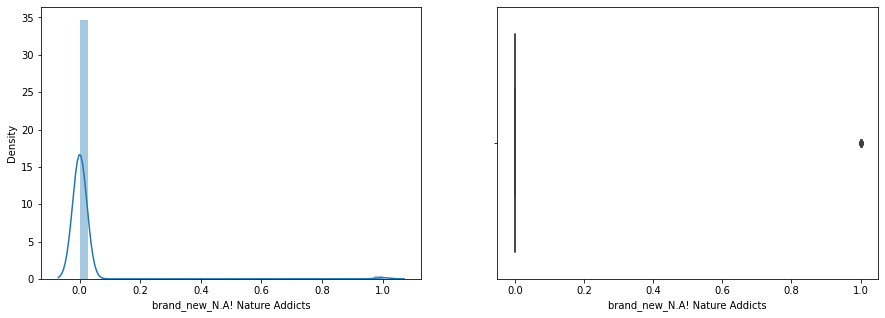

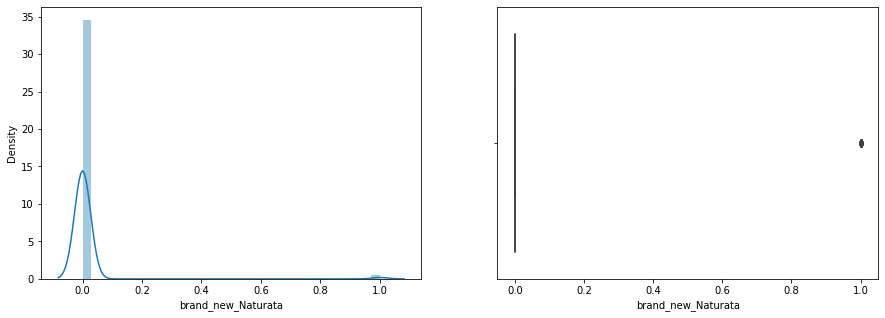

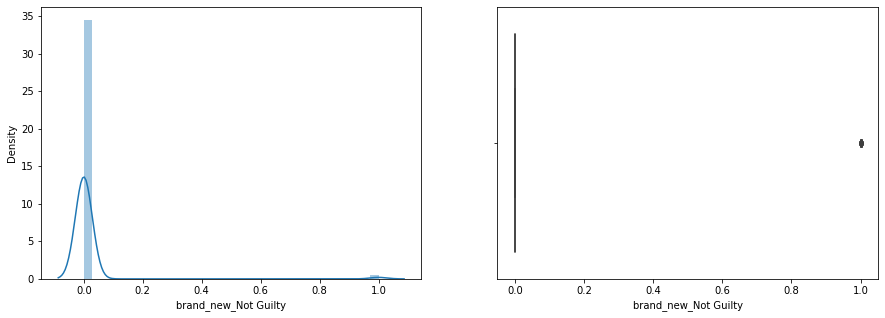

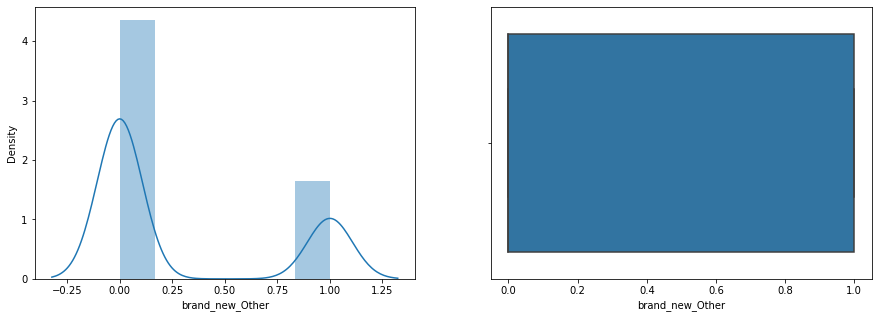

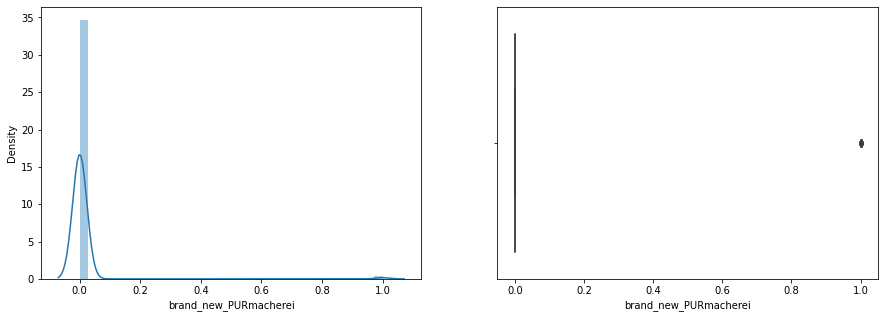

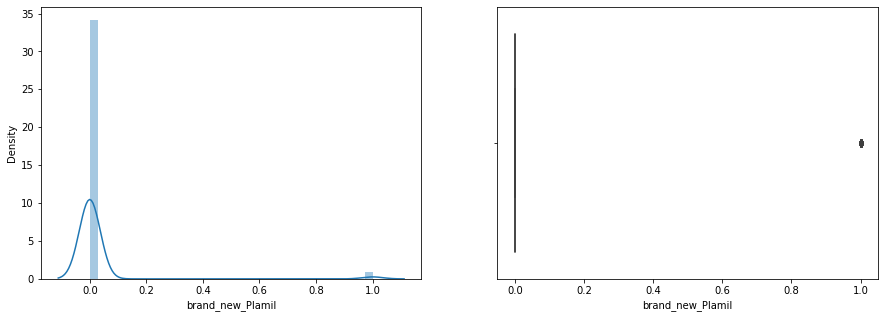

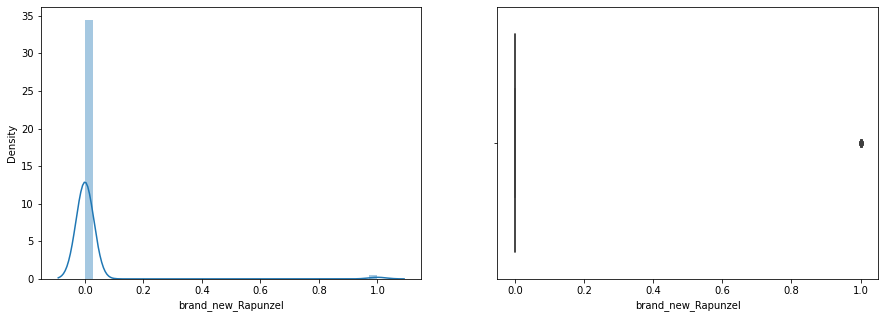

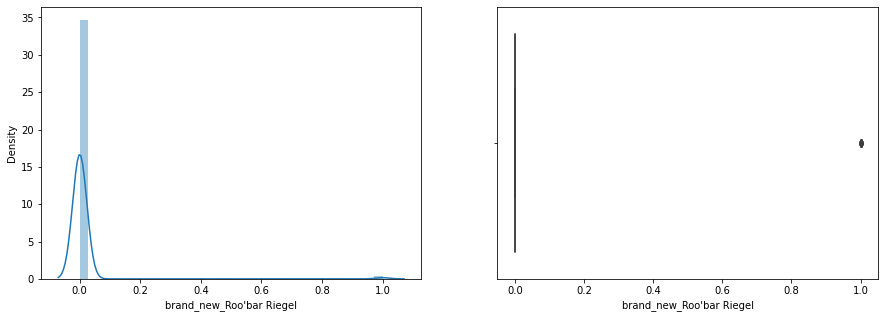

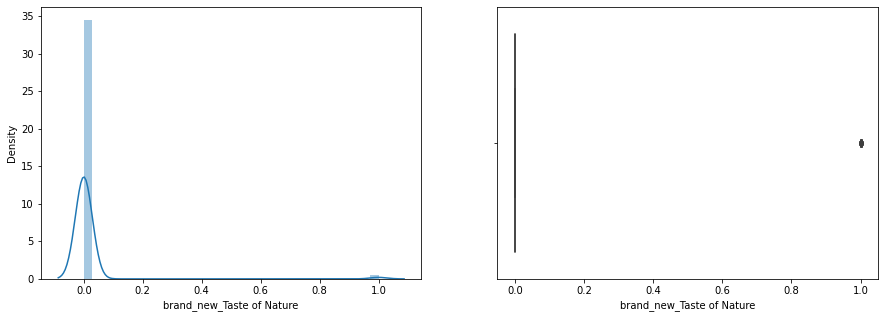

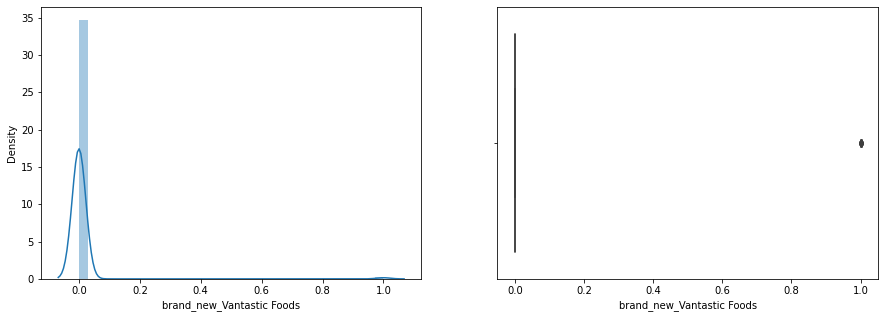

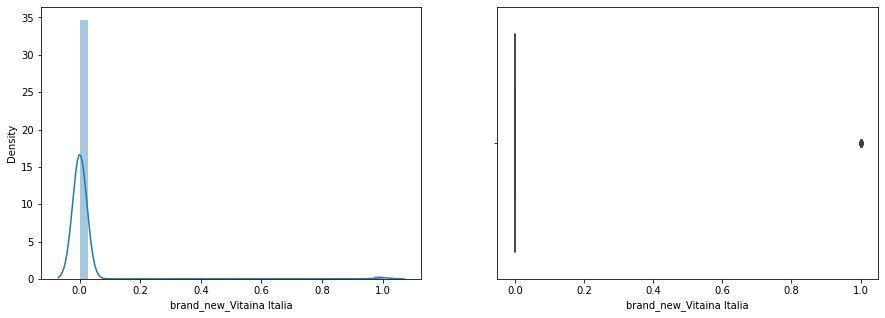

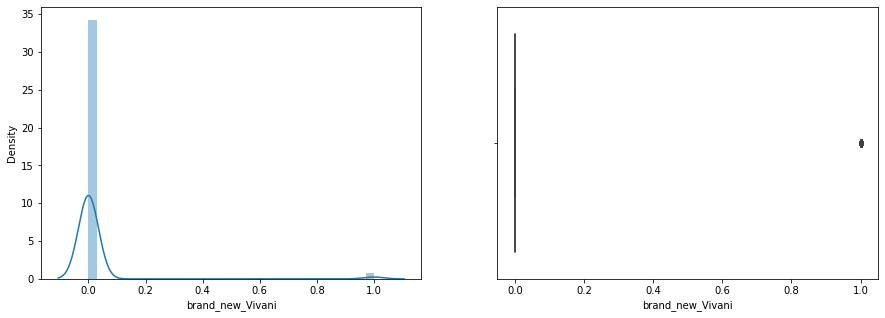

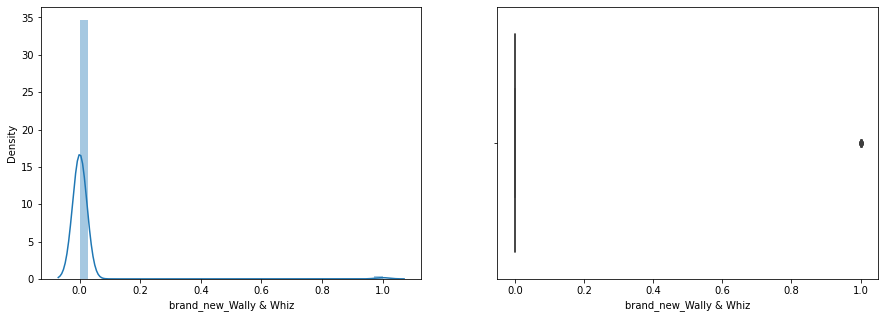

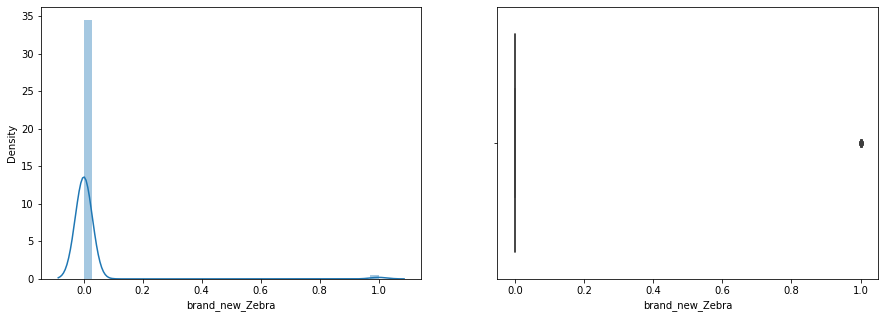

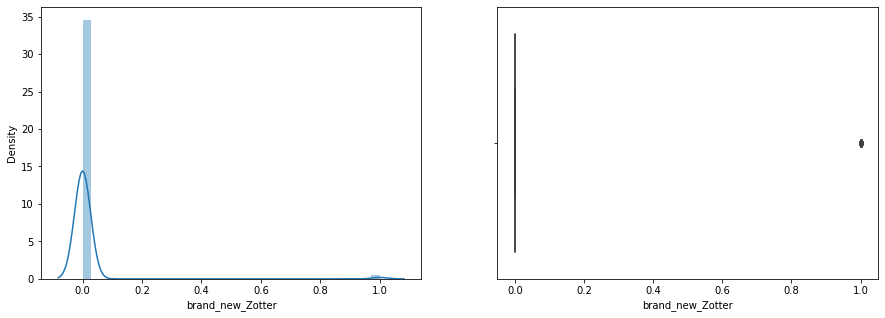

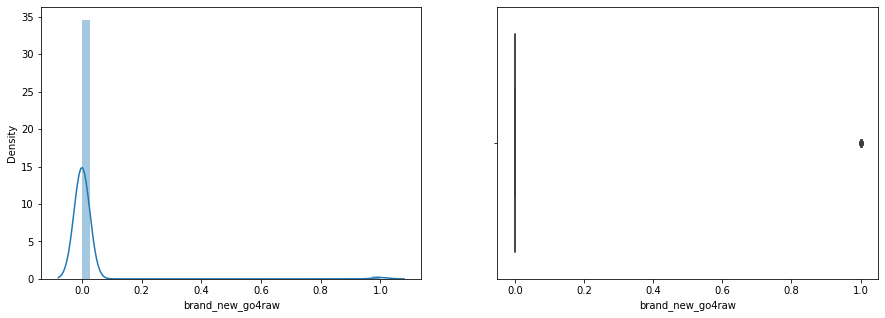

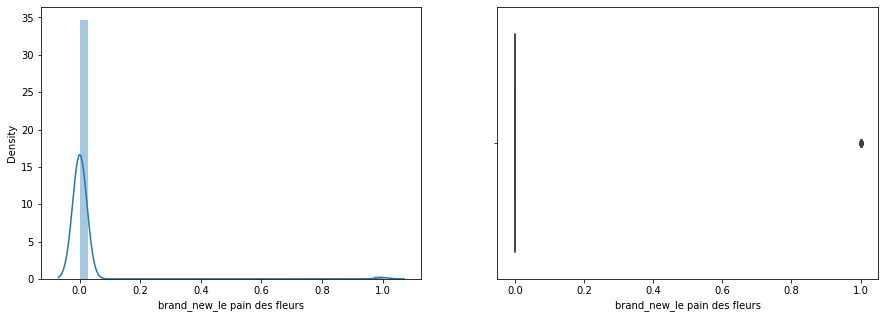

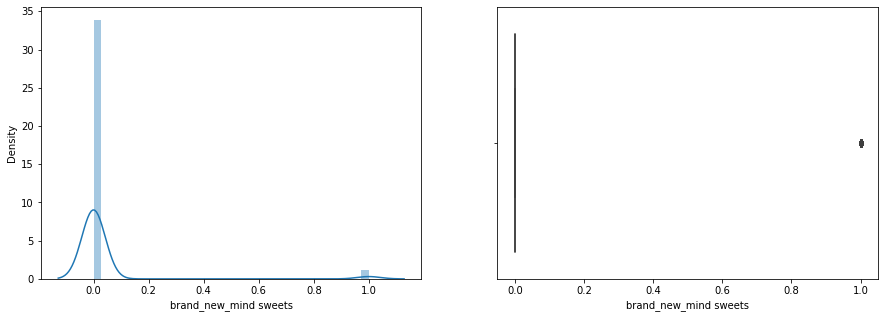

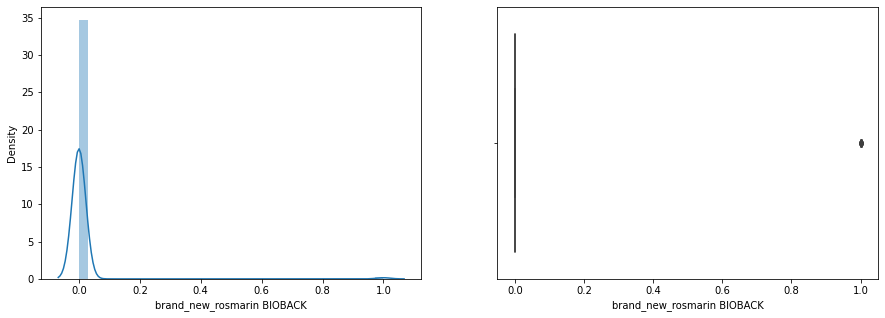

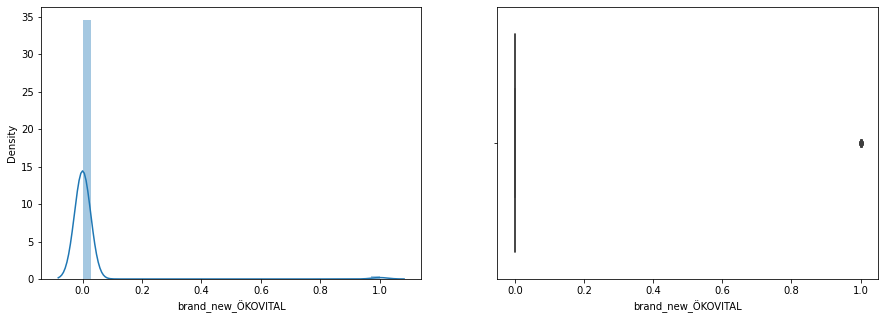

In [26]:
showing_dist_box(df_model)

### Scaling the data

In [27]:
df_model_sc = StandardScaler().fit_transform(df_model)
pd.DataFrame(df_model_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.824393,1.920951,-0.786445,-0.831300,-0.338529,-0.698729,2.374001,2.533067,-0.389985,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
1,1.824393,1.920951,0.829655,0.863320,1.218637,1.235795,-1.010864,-1.138195,-1.189500,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
2,1.824393,1.920951,-0.058665,-0.076184,0.180526,-0.053888,-0.710876,-0.932810,1.934797,1.510331,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
3,1.824393,1.920951,-0.773602,-0.822519,-0.396202,-0.859940,-1.260854,-1.240888,-1.389379,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
4,1.824393,1.920951,-0.291983,-0.313255,-0.626893,0.832769,-0.810872,1.788545,-1.189500,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708


## Model building

### First run (k=3)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=3, random_state=13)

In [29]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([2, 0, 0, ..., 2, 2, 2])

In [30]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    535
1     28
2    669
dtype: int64

In [31]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...,Koro,2
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...,Koro,0
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...,Koro,0
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...,Koro,0
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...,Koro,0


In [32]:
# "performance metric"
kmeans.inertia_

51334.24610730049

### Chosing the best k

#### Inertia

In [33]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 63033.10297679743
Iteration 1, inertia 53888.369846207206
Iteration 2, inertia 53852.28167110652
Converged at iteration 2: strict convergence.


53852.28167110652

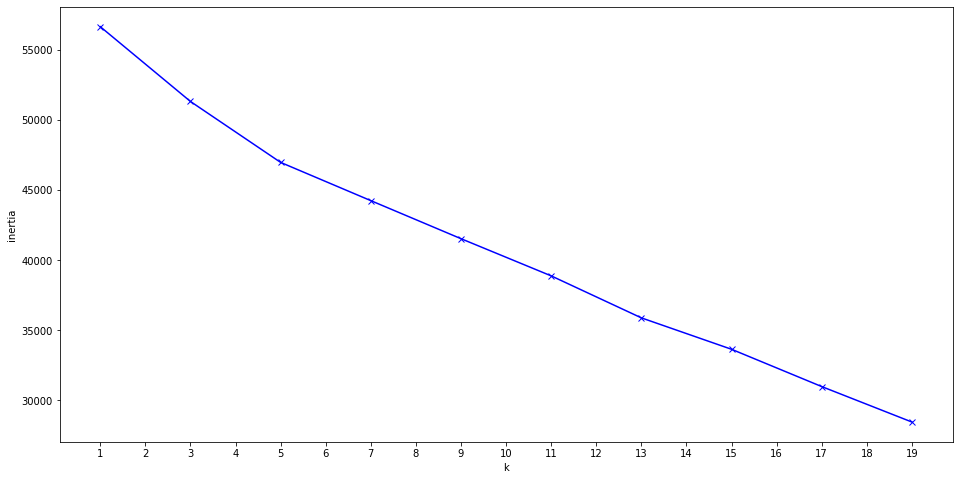

In [34]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Silhouette score

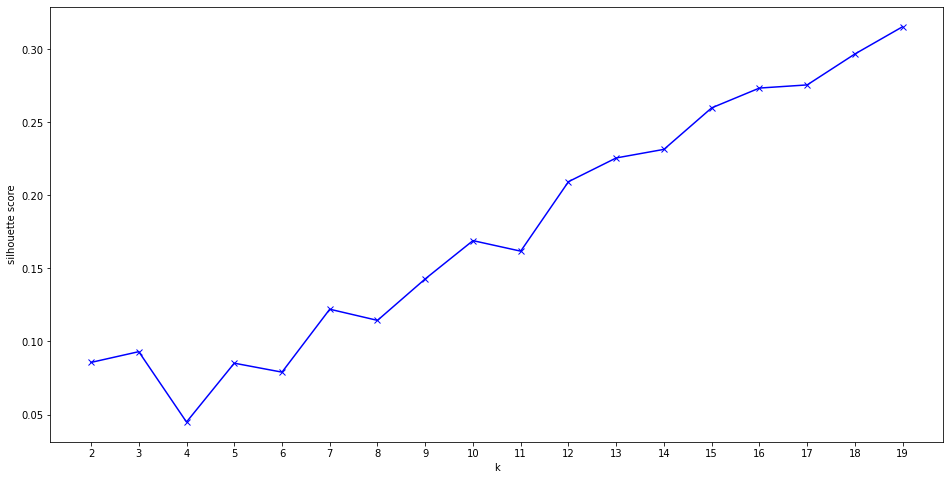

In [35]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    silhouette.append(silhouette_score(df_model_sc, kmeans.predict(df_model_sc)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

### Final model (k=10)

In [36]:
kmeans = KMeans(n_clusters=10, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=10, random_state=13)

In [37]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([2, 2, 2, ..., 5, 5, 5])

In [38]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     30
1    114
2    212
3     18
4     18
5    515
6    262
7     15
8     19
9     29
dtype: int64

In [39]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.sample(25)

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster
875,"BIO vegane Schokoladentafel ""Voll ohne Muh"" Ha...",MYLKCHOCY,3.50,0.060,2776.0,667.0,58.0,38.0,27.0,22.0,NaN,7.6,0.09,https://www.foodist.de/mylkchocy-bio-vegane-sc...,https://foodist.imgix.net/media/image/40337730...,MYLKCHOCY,6
937,Mandeln mit Zimt & Zucker,Vista Portuguese,7.90,0.125,2022.0,442.0,26.0,2.0,59.0,52.0,NaN,11.0,0.00,https://www.foodist.de/vista-portuguese-mandel...,https://foodist.imgix.net/media/image/56021326...,Other,5
1131,BIO Nut Butter Ball Cranberry & Pistachio,Foodist,1.45,0.030,1650.0,393.0,18.0,4.0,51.0,44.0,6.0,10.0,0.00,https://www.foodist.de/foodist-bio-nut-butter-...,https://foodist.imgix.net/media/image/42604537...,Foodist,1
523,Vegane Choco Cookies,Vegan Bakery,2.49,0.200,2169.0,519.0,27.0,13.0,62.0,28.0,NaN,6.5,0.16,https://kokku-online.de/vegan-bakery-vegane-ch...,https://kokku-online.de//bilder/350x350/10248/...,Other,5
900,BIO Nut Butter Ball Cranberry & Pistachio,Foodist,1.45,0.030,1650.0,393.0,18.0,4.0,51.0,44.0,6.0,10.0,0.00,https://www.foodist.de/foodist-bio-nut-butter-...,https://foodist.imgix.net/media/image/42604537...,Foodist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Bio grüne Oliven mit Stein,Koro,26.00,0.960,624.0,149.0,16.0,23.0,0.0,0.0,31.0,9.0,4.00,https://www.korodrogerie.de/bio-gruene-oliven-...,https://koro2.imgix.net/media/image/52/89/0a/B...,Koro,2
504,°Frühlingszauber° Schoko Schamane,mind sweets,3.79,0.050,2470.0,593.0,41.4,25.8,48.1,38.7,NaN,7.1,0.11,https://kokku-online.de/mind-sweets-fruehlings...,https://kokku-online.de//bilder/350x350/10652/...,mind sweets,6
271,Fruchtpapier Brombeere & Apfel,DÖRRWERK,2.99,0.040,1368.0,326.0,NaN,0.2,61.0,54.0,NaN,3.5,0.04,https://kokku-online.de/doerrwerk-fruchtpapier...,https://kokku-online.de//bilder/350x350/18587/...,Other,5
1011,Fruchtpapier Apfel & Erdbeere,Dörrwerk,1.50,0.018,1333.0,319.0,0.9,0.3,63.0,59.0,14.0,3.6,0.04,https://www.foodist.de/doerrwerk-fruchtpapier-...,https://foodist.imgix.net/media/image/42800015...,Dörrwerk,5


In [40]:
# "performance metric"
kmeans.inertia_

40144.4382772951

In [41]:
df.to_csv('df_clusters.csv')

## Recommender function

### Version 1: input = product name

In [42]:
user_input = input("What kind of snack do you like? ")

What kind of snack do you like?  chocolate


In [64]:
def suggestions_other_products(user_input):
    choices = df['product']
    
    rec = process.extract(user_input, choices)
    suggestion_list=[]
    for i in rec:
        suggestion_list.append(i[0])
    print("This exact snack was not found in the database. Did you mean one of these?"'\n', suggestion_list ,'\n')

In [65]:
suggestions_other_products(user_input)

This exact snack was not found in the database. Did you mean one of these?
 ['Bio Cookie Chocolate Chip  ', 'Bio Cookie Chocolate Chip ', 'Chocolate Experience Geschenkbox ', 'Coconut Mylk Chocolate Riegel ', 'Riegel °Protein Chocolate° '] 



In [76]:
def product_recommender(user_input):
    
    user_input = input("What kind of snack do you like? ")
    
    counter = -1
    flag = 0
    
    for p in df['product']:
        
        counter +=1
        
        if p == user_input:
            flag = 1
            cluster_product = df['cluster'].iloc[counter]
            print('The product belongs to this cluster: ', cluster_product) 
            
            df_cluster = df[df['cluster'] == cluster_product]
            new_products = df_cluster['product'].sample(5).values
            print('Your snack recommendations are: ', new_products)
        else:
            continue
        
    if flag == 0:  
        
        suggestions_other_products(user_input)
    

In [77]:
product_recommender(user_input)

What kind of snack do you like?  Lakritz


This exact snack was not found in the database. Did you mean one of these?
 ['Süße °Lakritz° Giraffen Schlange ', 'Helix Lakritz Schnecken ', 'Lucky Lakritz Stangen ', 'Süße Lakritz °Stangen° ', "Salzlakritz Tubi's "] 



In [78]:
product_recommender(user_input)

What kind of snack do you like?  Helix Lakritz Schnecken 


The product belongs to this cluster:  5
Your snack recommendations are:  ['Süße Kronen ' 'Energy Balls mit Haselnuss und Kakao'
 'Kartoffelchips mit Trüffel' 'Gemüsesticks Bunte Ernte '
 'Dame Blanche Kekse °Vanille° ']


In [58]:
def assume_product(user_input):
    choices = df['product']
    
    rec = process.extract(user_input, choices)
    lst=[]
    for i in rec:
        lst.append(i[1])
        #print(i[1])
        if lst[0]>95:
            user_input = i[0]#list.sort(key=lst, reverse=True)
            return 'I did not find an exact match in the database. I assume you mean this snack: ' + user_input +give_5bookrecommendationsCount(title_user)
        else:
            error

In [59]:
assume_product(user_input)

NameError: name 'error' is not defined

### Version 2: input = choice of random sample

In [86]:
def random_sample():
    
    cl_0 = df[df['cluster'] == 0].sample(1)
    cl_1 = df[df['cluster'] == 1].sample(1)
    cl_2 = df[df['cluster'] == 2].sample(1)
    cl_3 = df[df['cluster'] == 3].sample(1)
    cl_4 = df[df['cluster'] == 4].sample(1)
    cl_5 = df[df['cluster'] == 5].sample(1)
    cl_6 = df[df['cluster'] == 6].sample(1)
    cl_7 = df[df['cluster'] == 7].sample(1)
    cl_8 = df[df['cluster'] == 8].sample(1)
    cl_9 = df[df['cluster'] == 9].sample(1)
    
    
    new_df = pd.concat([cl_0, cl_1, cl_2, cl_3, cl_4, cl_5, cl_6, cl_7, cl_8, cl_9], axis=0)
    
    return new_df

In [88]:
random_sample()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster
462,So Free Tropical Orange 60%,Plamil,2.89,0.080,2334.0,562.0,38.5,24.0,42.3,39.100,NaN,6.8,0.07,https://kokku-online.de/plamil-so-free-tropica...,https://kokku-online.de//bilder/350x350/12142/...,Plamil,0
956,Gefriergetrocknete Erdbeeren in Zartbitterscho...,Foodist,9.95,0.500,2161.0,518.0,31.0,19.0,51.0,48.000,7.5,4.7,0.01,https://www.foodist.de/foodist-gefriergetrockn...,https://foodist.imgix.net/media/image/42604537...,Foodist,1
28,Bohnenmix Chili Limette,Koro,17.00,1.000,1796.0,428.0,16.0,20.0,36.0,12.000,97.0,31.0,14.00,https://www.korodrogerie.de/bohnenmix-chili-li...,https://koro2.imgix.net/media/image/24/9c/3d/B...,Koro,2
824,BIO Frucht-Nussriegel mit Paranüssen,Taste of Nature,2.49,0.040,2015.0,482.0,27.0,4.2,49.0,28.000,NaN,14.0,0.00,https://www.foodist.de/taste-of-nature-bio-fru...,https://foodist.imgix.net/media/image/05952760...,Taste of Nature,3
837,Veganer Proteinriegel mit Erdbeere,Zebra,1.90,0.040,1476.0,352.0,8.4,0.0,40.9,33.300,16.8,20.0,0.40,https://www.foodist.de/zebra-veganer-proteinri...,https://foodist.imgix.net/media/image/42607238...,Zebra,4
414,Fruttini Mix Geleefrüchte,ÖKOVITAL,1.59,0.100,1458.0,343.0,0.0,0.0,85.0,72.000,NaN,0.2,NaN,https://kokku-online.de/oekovital-fruttini-mix...,https://kokku-online.de//bilder/350x350/13400/...,ÖKOVITAL,5
264,Zartbitter Gebrannte Mandel,Vivani,1.99,0.080,2333.0,561.0,36.0,19.0,45.0,39.000,NaN,7.0,0.00,https://kokku-online.de/vivani-zartbitter-gebr...,https://kokku-online.de//bilder/350x350/19066/...,Vivani,6
371,Ingwer Kokos Nuss Mix,Landgarten,1.69,0.050,2210.0,532.0,38.0,18.0,36.0,26.000,NaN,10.0,0.03,https://kokku-online.de/landgarten-ingwer-koko...,https://kokku-online.de//bilder/350x350/15339/...,Landgarten,7
1002,Xylit Bonbons Orange,Birkengold,2.50,0.030,1072.0,257.0,1.8,1.8,93.0,0.000,NaN,0.0,0.40,https://www.foodist.de/birkengold-xylit-bonbon...,https://foodist.imgix.net/media/image/91200488...,Birkengold,8
353,Erdnuss Hafer Flips,Heimatgut,2.49,0.115,1941.0,463.0,20.0,3.1,58.0,0.009,NaN,10.0,0.72,https://kokku-online.de/heimatgut-erdnuss-hafe...,https://kokku-online.de//bilder/350x350/15195/...,Heimatgut,9
